In [40]:
import nest

In [41]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")

In [42]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 6,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 50,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [43]:
neuron.get("I_e")
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [44]:
neuron.set(I_e=376.0)

In [45]:
neuron.set({"I_e": 376})

In [46]:
neuron.I_e = 376.0
neuron.I_e

376.0

In [47]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [48]:
spikerecorder = nest.Create("spike_recorder")

In [49]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [50]:
nest.Simulate(1000.0)


Oct 31 13:30:26 NodeManager::prepare_nodes [Info]: 
    Preparing 8 nodes for simulation.

Oct 31 13:30:26 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 8
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 31 13:30:26 SimulationManager::run [Info]: 
    Simulation finished.


In [51]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

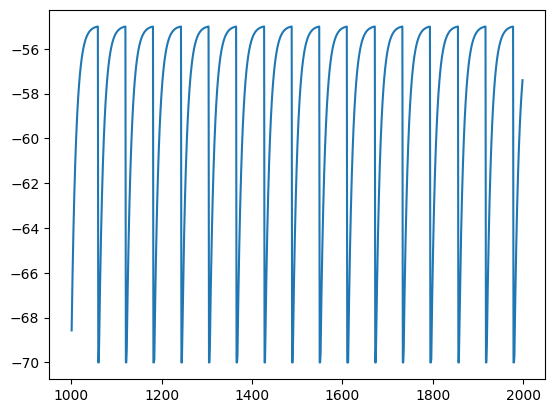

In [52]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms)

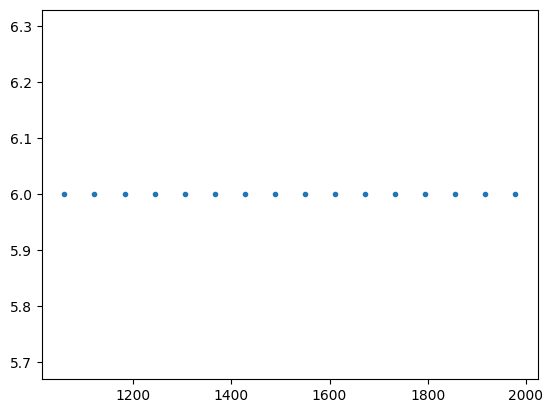

In [53]:
events = spikerecorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

In [55]:
neuron2 = nest.Create("iaf_psc_alpha")
neuron2.set({"I_e": 370.0})

In [56]:
nest.Connect(multimeter, neuron2)

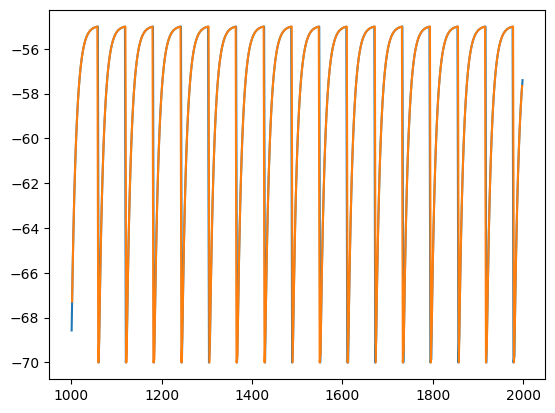

In [57]:
plt.figure(2)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
plt.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
plt.plot(ts2, Vms2)

In [59]:
print("Malatanghulu")

Malatanghulu
